### Les toolboxes images dans Python

Dans un premier temps, en supposant que vous ayez installé  Anaconda avec Python 2, sous Windows ou Linux, il faut installer la librairie openCV pour le traitement des images.
Pour ce faire, allez dans le terminal et écrivez: «pip install openCV«. Ensuite, pour utiliser cette librairie, il faut écrire au début de chaque ficher notebook «import cv2». 
Vous pouvez avoir tous les détails sur https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html.

Cette partie TP est largement prise de la page http://images.math.cnrs.fr/le-traitement-numerique-des-images.html?lang=fren après l'avoir adaptée pour Python. Cet article est "basique" mais les manipulations sont cependant intéressantes à faire dans un premier temps.


### Les pixels d'une image

Une <font color=red>image numérique</font> en niveaux de gris est un tableau de valeurs. Chaque case de ce tableau, qui stocke une valeur, se nomme un <font color=red>pixel</font>. En notant le nombre de lignes et le nombre de colonnes de l'image, on manipule ainsi un tableau de pixels.
La figure 1 montre une visualisation d'un tableau carré ce qui représente 57600 (240*240) pixels. Les appareils photos numériques peuvent enregistrer des images beaucoup plus grandes, avec plusieurs millions de pixels.

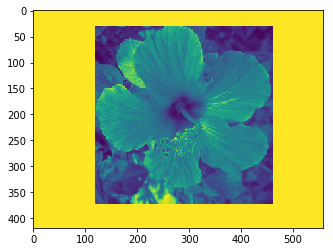

(419, 559)


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('hibiscus_01.png',0)
#cv2.startWindowThread()
#cv2.namedWindow('fig1')
#cv2.imshow('fig1', img)
#cv2.waitKey()
#cv2.destroyAllWindows()

plt.imshow(img)
plt.show()

print(img.shape)

Les valeurs des pixels sont enregistrées dans l'ordinateur ou l'appareil photo numérique sous forme de <font color=red>nombres entiers</font> entre 0 et 255, ce qui fait 256 valeurs possibles pour chaque pixel.
La valeur 0 correspond au noir, et la valeur 255 correspond au blanc. Les valeurs intermédiaires correspondent à des <font color=red>niveaux de gris</font> allant du noir au blanc.
La figure 2 montre un sous-tableau de  pixels extrait de l'image précédente. On peut voir à la fois les valeurs qui composent le tableau et les niveaux de gris qui permettent d'afficher l'image à l'écran.

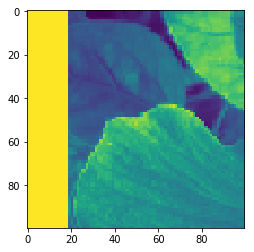

array([[152, 152, 152, 149, 153],
       [152, 152, 137, 149, 159],
       [145, 145, 139, 144, 142],
       [145, 145, 139, 144, 142],
       [160, 160, 144, 156, 144]], dtype=uint8)

In [3]:
img_small=img[100:200,100:200]
#cv2.startWindowThread()
#cv2.namedWindow('fig2')
#cv2.imshow('fig2',img_small)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.imwrite('img_small.png',img_small)
plt.imshow(img_small)
plt.show()
img_small[61:66,61:66]

L' <font color=red>histogramme</font> est un graphique statistique permettant de représenter le nombre de pixels pour chaque intensité lumineuse. Par convention un histogramme représente le niveau d'intensité en abscisseen allant du plus foncé (à gauche) au plus clair (à droite). 

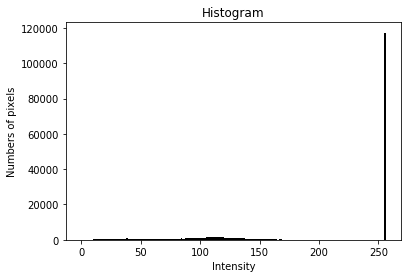

In [6]:
plt.figure(3)
plt.hist(img.ravel(),256,[0,256],fc='k')
plt.title('Histogram')
plt.xlabel('Intensity')
plt.ylabel('Numbers of pixels')
plt.show()

### La résolution d'une image


Afin de réduire la place de stockage d'une image, on peut réduire sa <font color=red>résolution</font>, c'est-à-dire diminuer le nombre de pixels (on parlera également de sous-échantillonnage !).
La façon la plus simple d'effectuer cette réduction consiste à supprimer des lignes et des colonnes dans l'image de départ.
La figure 3 montre ce que l'on obtient si l'on retient une ligne sur 4 et une colonne sur 4.

In [7]:
[lignes,colonnes]= img.shape
#print lignes
#print colonnes

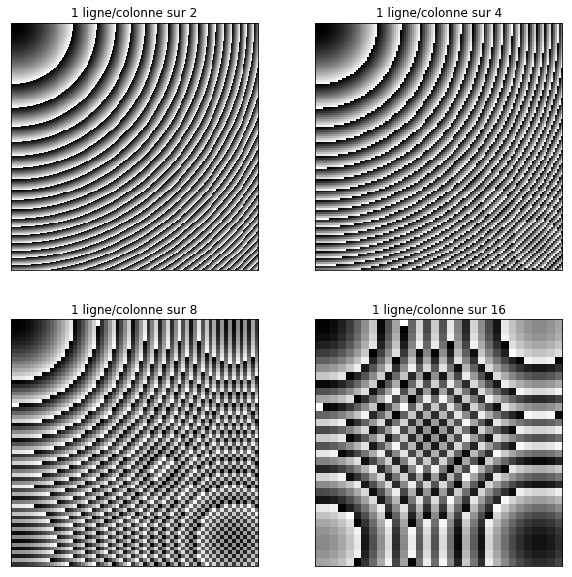

In [8]:
img_sub_sampled_2 = img[1:lignes:2,1:colonnes:2]
img_sub_sampled_4 = img[1:lignes:4,1:colonnes:4]
img_sub_sampled_8 = img[1:lignes:8,1:colonnes:8]
img_sub_sampled_16 = img[1:lignes:16,1:colonnes:16]

plt.figure(4,figsize = (10,10))
plt.subplot(221),plt.imshow(img_sub_sampled_2, cmap = 'gray')
plt.title('1 ligne/colonne sur 2'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_sub_sampled_4, cmap = 'gray')
plt.title('1 ligne/colonne sur 4'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_sub_sampled_8, cmap = 'gray')
plt.title('1 ligne/colonne sur 8'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_sub_sampled_16, cmap = 'gray')
plt.title('1 ligne/colonne sur 16'), plt.xticks([]), plt.yticks([])
plt.show()     

### Quantifier une image

Une autre façon de réduire la place mémoire nécessaire pour le stockage consiste à utiliser moins de nombres entiers pour chaque valeur.
On peut par exemple utiliser uniquement des nombres entiers entre 0 et 3, ce qui donnera une image avec uniquement 4 niveau de gris.
On peut effectuer une conversion de l'image d'origine vers une image avec 3 niveaux de valeurs en effectuant les remplacements:
Une telle opération se nomme quantification.
La figure 5 montre l'image résultante avec 4 niveaux de couleurs. Les 4 valeurs sont affichées en utilisant 4 niveaux de gris allant du noir au blanc.

In [9]:
quant =(img[:,:]/64)*64;

cv2.startWindowThread()
cv2.namedWindow('fig5')
cv2.imshow('fig5',quant)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Tout comme pour la réduction du nombre de pixels, la réduction du nombre de niveaux de gris influe beaucoup sur la qualité de l'image. Afin de réduire au maximum la taille d'une image sans modifier sa qualité, on utilise des méthodes plus complexes de compression d'image. La méthode la plus efficace s'appelle JPEG-2000. Elle utilise la théorie des ondelettes.  Ces techniques seront abordées dans les projects 2 et 3.

### Les images couleurs

Une image couleur est en réalité composée de trois images indépendantes, afin de représenter le rouge, le vert, et le bleu. Chacune de ces trois images s'appelle canal. Cette représentation en rouge, vert et bleu mime le fonctionnement du système visuel humain.
La figure 6 suivante montre le canal rouge de l'image.

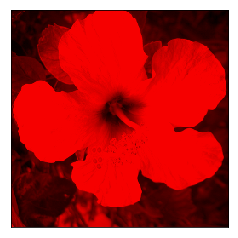

In [7]:
img_color = cv2.imread('AAA.png')
img_rouge = img_color
img_rouge[:,:,0]=0
img_rouge[:,:,1]=0    

plt.figure(6)
plt.imshow(cv2.cvtColor(img_rouge, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  
plt.show()

In [8]:
'''faire la meme chose pour le vert et le bleu'''

'faire la meme chose pour le vert et le bleu'


Chaque pixel de l'image couleur contient ainsi trois nombres, chacun étant un nombre entier entre 0 et 255. Si le pixel est égal à $(r,v,b)=(255,0,0)$, il ne contient que de l'information rouge, et est affiché comme du rouge. De façon similaire, les pixels valant  et  sont respectivement affichés vert et bleu.
On peut afficher à l'écran une image couleur à partir de ses trois canaux  en utilisant les règles de la <font color=red> synthèse additive des couleurs</font>. Par exemple un pixel avec les valeurs est un mélange de rouge et de vert, il est donc affiché comme du jaune.
On peut calculer une image en niveau de gris à partir d'une image couleur en moyennant les trois cannaux. On calcule donc une valeur
qui s'appelle la <font color=red>luminance</font> de la couleur.
La figure 7 suivante montre le passage d'une image couleur à une image de luminance en niveau de gris.

In [9]:
lum = (img_color[:,:,0] + img_color[:,:,1] + img_color[:,:,2])/3

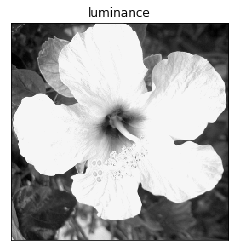

In [10]:
plt.figure(7)
plt.imshow(lum, cmap='gray')
plt.xticks([]), plt.yticks([])  
plt.title("luminance")
plt.show()

### Spectre (fréquentiel) d’une image.
On vous donne une image relativement simple d’arcs de cercle concentriques. L’objectif est de tracer le spectre fréquentiel de l’image (les « a plats » étant une fréquence faible, voire nulle, les changements brusques de noir à blanc ou inversément étant des fréquences élevées.) 

In [20]:
#Creation image avec des cercles

# Taille image
width = 512
height = 512
channels = 3

# Creation image vide
img = np.zeros((height, width, channels), dtype=np.uint8)

# Dessin cercles 
xx, yy = np.mgrid[:height:0.4, :width:0.4]
                
circle = ((xx/3) - 1) ** 2 + ((yy/3) - 1) ** 2

# Definition RGB valeurs
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        r, g, b = circle[y][x], circle[y][x], circle[y][x]
        img[y][x][0] = r
        img[y][x][1] = g
        img[y][x][2] = b

cv2.imwrite('cercles.png',img)

xx.shape
yy.shape   

(1280, 1280)

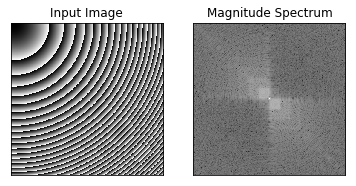

In [6]:
img = cv2.imread('cercles.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()